In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pickle
import datetime
import glob
import os
import sys

In [26]:
inDir = '/data0/Dropbox/research/data/CCMC_Conductivites/17march2013/'

inFiles = glob.glob(os.path.join(inDir,'*.txt'))
print inFiles

unixTime = numpy.zeros(2)
HallConduct = numpy.zeros(2)
PedConduct = numpy.zeros(2)

for ifile in inFiles:
    tmp = numpy.genfromtxt(ifile,skip_header=15,delimiter=',')
    unixTime =  numpy.concatenate([unixTime,tmp[:,0]])
    PedConduct = numpy.concatenate([PedConduct,tmp[:,2]])
    HallConduct = numpy.concatenate([HallConduct,tmp[:,3]])

unixTime = unixTime[2:]
PedConduct = PedConduct[2:]
HallConduct = HallConduct[2:]
    
qsort = numpy.argsort(unixTime)
unixTime = unixTime[qsort]
PedConduct = PedConduct[qsort]
HallConduct = HallConduct[qsort]





['/data0/Dropbox/research/data/CCMC_Conductivites/17march2013/PFISR_Conductance_20130317T1002UT_20130317T1559UT.txt', '/data0/Dropbox/research/data/CCMC_Conductivites/17march2013/PFISR_Conductance_20130317T0001UT_20130317T2355UT.txt']


In [27]:
# make the labels

t1970 = datetime.datetime(1970,1,1,0,0,0)
dtStart = datetime.datetime.utcfromtimestamp(unixTime[0])
dtStartDay = datetime.datetime(dtStart.year,dtStart.month,dtStart.day,0,0,0)
tUnixStartTime = (dtStartDay-t1970).total_seconds()

dtEnd = datetime.datetime.utcfromtimestamp(unixTime[-1])
dtEndDay = datetime.datetime(dtEnd.year,dtEnd.month,dtEnd.day+1,0,0,0)
tUnixEndTime = (dtEndDay-t1970).total_seconds()


In [28]:
print tUnixStartTime, tUnixEndTime

1363478400.0 1363564800.0


In [34]:
# make a uniform range that is separated by so many hours
dt = 6.*3600.

locs = numpy.arange(tUnixStartTime,tUnixEndTime+dt,dt)

In [35]:
labels = list()
for itime in locs:
    tmpdt = datetime.datetime.utcfromtimestamp(itime)
    tmplabel = '%02d/%02d\n%02d:%02d'%(tmpdt.month,tmpdt.day,tmpdt.hour,tmpdt.minute)
    print tmplabel
    labels.append(tmplabel)

03/17
00:00
03/17
06:00
03/17
12:00
03/17
18:00
03/18
00:00


In [36]:
tmpdt = datetime.datetime.utcfromtimestamp(locs[0])
tStartStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day, tmpdt.hour, tmpdt.minute)
tmpdt = datetime.datetime.utcfromtimestamp(locs[-1])
tEndStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day,tmpdt.hour, tmpdt.minute)

title = 'PFISR Conductance '+tStartStr+' - '+tEndStr
print tStartStr, tEndStr, title

2013-03-17 00:00 UT 2013-03-18 00:00 UT PFISR Conductance 2013-03-17 00:00 UT - 2013-03-18 00:00 UT


In [37]:
print labels

['03/17\n00:00', '03/17\n06:00', '03/17\n12:00', '03/17\n18:00', '03/18\n00:00']


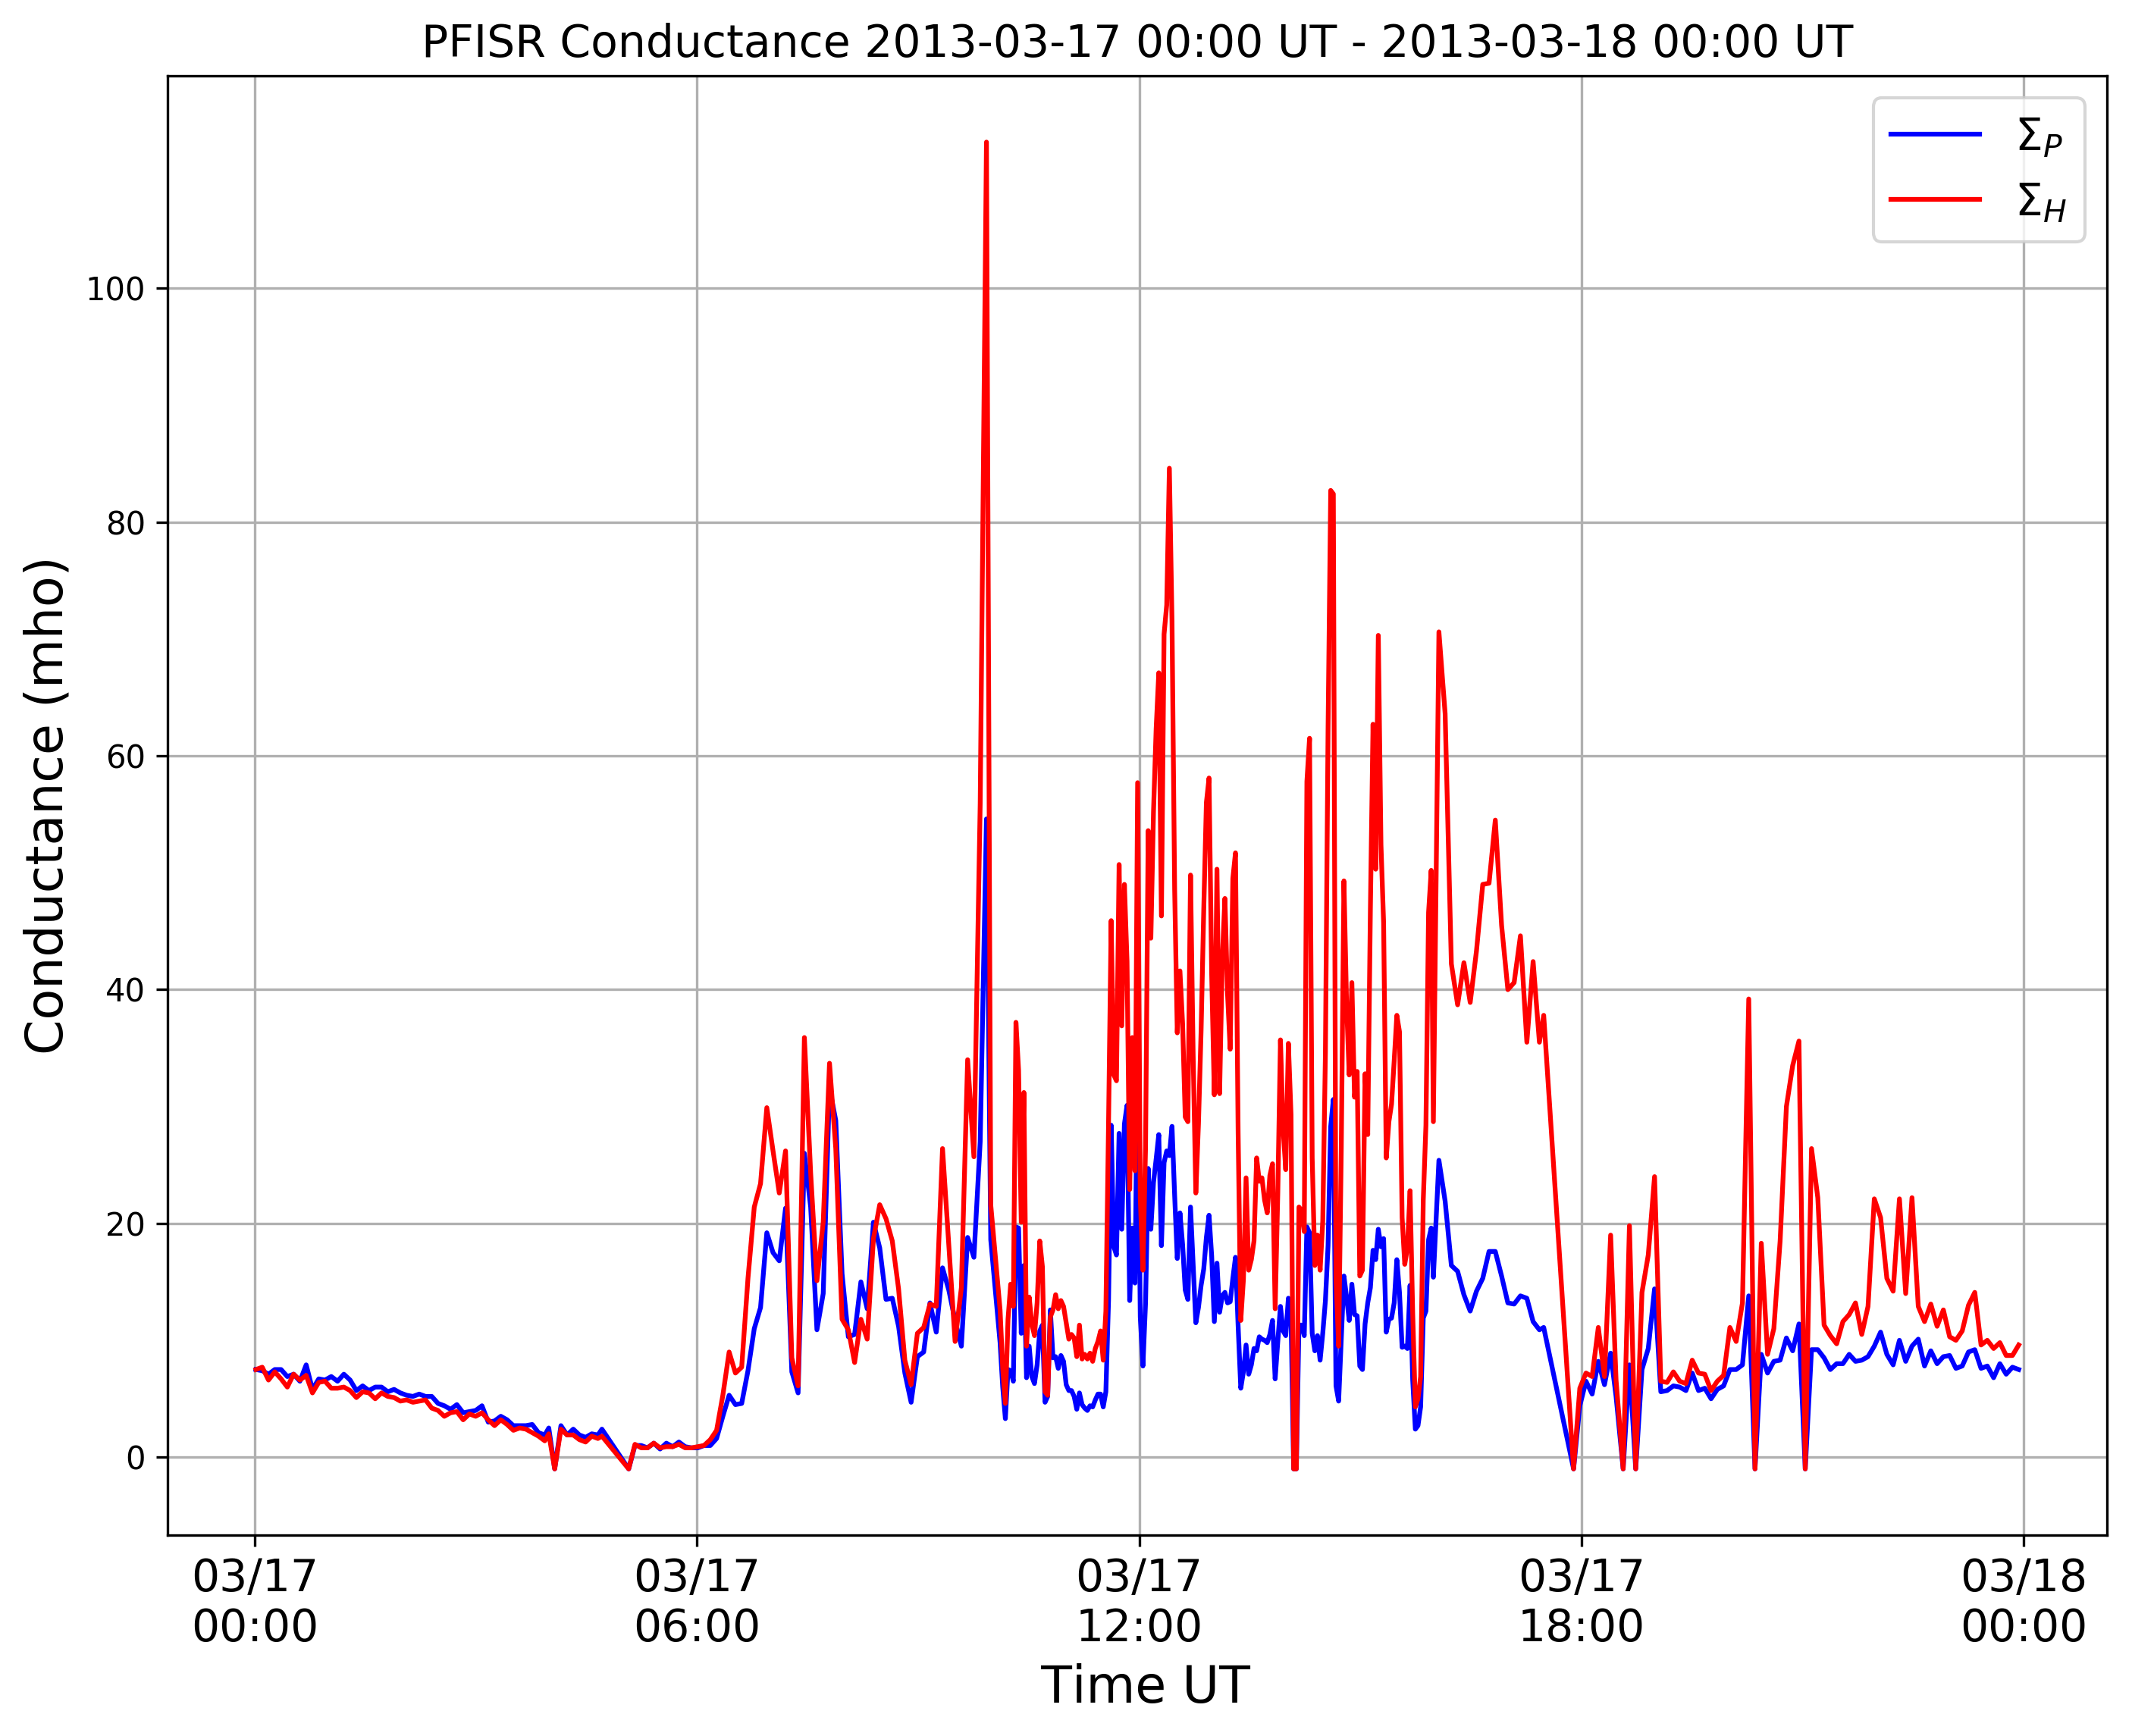

In [43]:
plt.figure(dpi=300, figsize=(11,8.5))
plt.plot(unixTime,PedConduct, 'b-', label=r'$\Sigma_{P}$')
plt.plot(unixTime,HallConduct, 'r-', label=r'$\Sigma_{H}$')
plt.xticks(locs, labels,fontsize=14)
plt.legend()
plt.grid()
plt.title(title,fontsize=14)
plt.ylabel('Conductance (mho)',fontsize=16)
plt.xlabel(' Time UT', fontsize=16)
plt.legend(prop={'size': 14})
plt.savefig('tmpPFISR_Conductance_20150316_20150326.pdf')
# plt.xticklabels(labels)

In [8]:
def MakeFigure(inDir,intervalStr):
    inFiles = glob.glob(os.path.join(inDir,'*.txt'))
    print inFiles

    unixTime = numpy.zeros(2)
    HallConduct = numpy.zeros(2)
    PedConduct = numpy.zeros(2)

    for ifile in inFiles:
        tmp = numpy.genfromtxt(ifile,skip_header=15,delimiter=',')
        unixTime =  numpy.concatenate([unixTime,tmp[:,0]])
        PedConduct = numpy.concatenate([PedConduct,tmp[:,2]])
        HallConduct = numpy.concatenate([HallConduct,tmp[:,3]])

    unixTime = unixTime[2:]
    PedConduct = PedConduct[2:]
    HallConduct = HallConduct[2:]

    qsort = numpy.argsort(unixTime)
    unixTime = unixTime[qsort]
    PedConduct = PedConduct[qsort]
    HallConduct = HallConduct[qsort]
    
    t1970 = datetime.datetime(1970,1,1,0,0,0)
    dtStart = datetime.datetime.utcfromtimestamp(unixTime[0])
    dtStartDay = datetime.datetime(dtStart.year,dtStart.month,dtStart.day,0,0,0)
    tUnixStartTime = (dtStartDay-t1970).total_seconds()

    dtEnd = datetime.datetime.utcfromtimestamp(unixTime[-1])
    dtEndDay = datetime.datetime(dtEnd.year,dtEnd.month,dtEnd.day+1,0,0,0)
    tUnixEndTime = (dtEndDay-t1970).total_seconds()
    
    # make a uniform range that is separated by so many hours
    if intervalStr == 'day':
        dt = 6.*3600.
    if intervalStr == 'manyday':
        dt = 24.*3600.
    locs = numpy.arange(tUnixStartTime,tUnixEndTime+dt,dt)
    
    labels = list()
    for itime in locs:
        tmpdt = datetime.datetime.utcfromtimestamp(itime)
        tmplabel = '%02d/%02d\n%02d:%02d'%(tmpdt.month,tmpdt.day,tmpdt.hour,tmpdt.minute)
        print tmplabel
        labels.append(tmplabel)
    
    tmpdt = datetime.datetime.utcfromtimestamp(locs[0])
    tStartStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day, tmpdt.hour, tmpdt.minute)
    tmpdt1 = datetime.datetime.utcfromtimestamp(locs[-1])
    tEndStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt1.year,tmpdt1.month,tmpdt1.day,tmpdt1.hour, tmpdt1.minute)

    title = 'PFISR Conductance '+tStartStr+' - '+tEndStr
    print tStartStr, tEndStr, title
    dateTimeStr = '_%04d%02d%02d_%04d%02d%02d'%(tmpdt.year,tmpdt.month,tmpdt.day,tmpdt1.year,tmpdt1.month,tmpdt1.day)
    fileStr = 'PFISR_Conductance_Summary'+dateTimeStr
    outFile = os.path.join(inDir,fileStr)
    
    plt.figure(dpi=300, figsize=(11,8.5))
    plt.plot(unixTime,PedConduct, 'b-', label=r'$\Sigma_{P}$')
    plt.plot(unixTime,HallConduct, 'r-', label=r'$\Sigma_{H}$')
    plt.xticks(locs, labels,fontsize=14)
    plt.legend()
    plt.grid()
    plt.title(title,fontsize=14)
    plt.ylabel('Conductance (mho)',fontsize=16)
    plt.xlabel(' Time UT', fontsize=16)
    plt.legend(prop={'size': 14})
    plt.savefig(outFile)
    plt.close()
    
    outFileTxT = outFile+'.txt'
    X = numpy.array([unixTime,PedConduct,HallConduct])
    with open(os.path.join(inDir,outFileTxT), 'wb') as f:
        f.write('############################################################################################# \n')
        f.write('Author: S.R. Kaeppler \n')
        f.write('Email: skaeppl@clemson.edu \n')
        f.write('Version number: v0.2\n')
        f.write('File Created: %s \n'%datetime.datetime.now())
        f.write('Valid Time: %s-%s\n'%(tStartStr,tEndStr))

        f.write('\n')
        f.write('Columns (values of -1 indicate failed altitude integration) \n')
        f.write('UnixTime: seconds since 01 January 1970 00:00:00 UT, absolute time reference \n')
        f.write('Time: UT Decimal Hours (hours) \n ')
        f.write('Pedersen Conductance (mho) using MSIS Tn=Ti \n')
        f.write('Hall Conductance (mho) using MSIS Tn=Ti \n')
    # f.write('Pedersen Conductance (mho) using ISR Ti and MSIS Tn \n')
    # f.write('Hall Conductance (mho) using ISR Ti and MSIS Tn \n')
        f.write('############################################################################################# \n')
        numpy.savetxt(f,X.T, fmt='%d, %0.1f, %0.1f')
    
    return

In [9]:
inDir = '/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/17march2013/'
MakeFigure(inDir,'day')

inDir = '/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/13_15Oct2016/'
MakeFigure(inDir,'manyday')

inDir = '/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/21_24June2015/'
MakeFigure(inDir,'manyday')

['/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/17march2013/PFISR_Conductance_20130317T1002UT_20130317T1559UT.txt', '/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/17march2013/PFISR_Conductance_20130317T0001UT_20130317T2355UT.txt']
03/17
00:00
03/17
06:00
03/17
12:00
03/17
18:00
03/18
00:00
2013-03-17 00:00 UT 2013-03-18 00:00 UT PFISR Conductance 2013-03-17 00:00 UT - 2013-03-18 00:00 UT
['/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/13_15Oct2016/PFISR_Conductance_20161013T0003UT_20161015T2357UT.txt']
10/13
00:00
10/14
00:00
10/15
00:00
10/16
00:00
2016-10-13 00:00 UT 2016-10-16 00:00 UT PFISR Conductance 2016-10-13 00:00 UT - 2016-10-16 00:00 UT
['/Users/srkaeppler/Dropbox/research/data/CCMC_Conductivites/21_24June2015/PFISR_Conductance_20150621T0633UT_20150624T2357UT.txt']
06/21
00:00
06/22
00:00
06/23
00:00
06/24
00:00
06/25
00:00
2015-06-21 00:00 UT 2015-06-25 00:00 UT PFISR Conductance 2015-06-21 00:00 UT - 2015-06-25 00:00 UT
